# Graded Assessment on Statistics for Decision Making


In [ ]:
# 1. For the suburb Altona, it is postulated that a typical property sells for $800,000. Use the data at hand to test this assumption. 
# Is the typical property price really $800,000 or has it increased? Use a significance level of 5%. 

Sample Mean Price: 834830.4054054054
Sample Standard Deviation: 291546.04547367844
T-Statistic: 1.0277020770199676, P-Value: 0.307483271305555
Fail to reject the null hypothesis: The typical property price is $800,000.


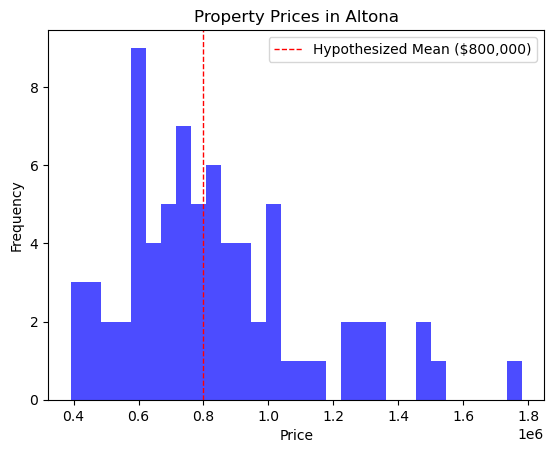

In [1]:
# Step 1: Import Libraries
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Step 2: Load the Data
data = pd.read_csv('property.csv')

# Step 3: Filter the Data for Altona
altona_data = data[data['Suburb'] == 'Altona']

# Step 4: Perform the T-Test
# Hypothesized mean price
hypothesized_mean = 800000

# Calculate the sample mean and standard deviation
sample_mean = altona_data['Price'].mean()
sample_std = altona_data['Price'].std()
n = len(altona_data)

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(altona_data['Price'], hypothesized_mean)

# Step 5: Interpret the Results
alpha = 0.05  # significance level
if p_value < alpha:
    conclusion = "Reject the null hypothesis: The typical property price has increased."
else:
    conclusion = "Fail to reject the null hypothesis: The typical property price is $800,000."

# Print results
print(f"Sample Mean Price: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")
print(f"T-Statistic: {t_statistic}, P-Value: {p_value}")
print(conclusion)

# Optional: Visualize the distribution of property prices
plt.hist(altona_data['Price'], bins=30, alpha=0.7, color='blue')
plt.axvline(hypothesized_mean, color='red', linestyle='dashed', linewidth=1, label='Hypothesized Mean ($800,000)')
plt.title('Property Prices in Altona')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
""" The average property price in Altona is approximately $834,830.
 This value is higher than the hypothesized mean of $800,000.

 The standard deviation is about $291,546, indicating a considerable variation in property prices. 
 This suggests that there are properties significantly below and above the mean price.

 The t-statistic of approximately 1.03 indicates how far the sample mean is from the hypothesized mean in terms of standard error.

 The p-value of 0.307 is much greater than the significance level of 0.05. 
 This indicates that the evidence is not strong enough to reject the null hypothesis.

 
 

In [ ]:
# 2. For the year 2016, is there any difference in prices of properties sold in the summer months vs winter months? 
# Consider months from October till March as winter months and the rest as summer months. Use a significance level of 5%. 

['3/12/2016' '4/02/2016' '4/03/2017' '4/06/2016' '7/05/2016' '8/10/2016'
 '12/11/2016' '13/08/2016' '14/05/2016' '15/10/2016' '16/07/2016'
 '17/09/2016' '18/03/2017' '18/06/2016' '19/11/2016' '22/08/2016'
 '24/09/2016' '25/02/2017' '26/07/2016' '27/11/2016' '28/05/2016'
 '30/07/2016' '3/09/2016' '6/08/2016' '7/11/2016' '10/09/2016'
 '10/12/2016' '11/02/2017' '16/04/2016' '22/05/2016' '23/04/2016'
 '12/06/2016' '27/06/2016' '28/08/2016' '11/03/2017' '28/01/2016'
 '6/05/2017' '8/04/2017' '29/04/2017' '13/05/2017' '20/05/2017'
 '22/04/2017' '1/07/2017' '3/06/2017' '17/06/2017' '24/06/2017'
 '27/05/2017' '8/07/2017' '12/08/2017' '15/07/2017' '22/07/2017'
 '29/07/2017' '3/09/2017' '9/09/2017' '16/09/2017' '19/08/2017'
 '23/09/2017' '26/08/2017']
0
T-Statistic: -4.608647592396178, P-Value: 4.259096710154727e-06
Reject the null hypothesis: There is a significant difference in property prices between summer and winter.


C:\Users\PAVITHRA\AppData\Local\Temp\ipykernel_4448\3564834312.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2016['Month'] = data_2016['Date'].dt.month
C:\Users\PAVITHRA\AppData\Local\Temp\ipykernel_4448\3564834312.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2016['Season'] = data_2016['Month'].apply(lambda x: 'Summer' if x in summer_months else 'Winter')


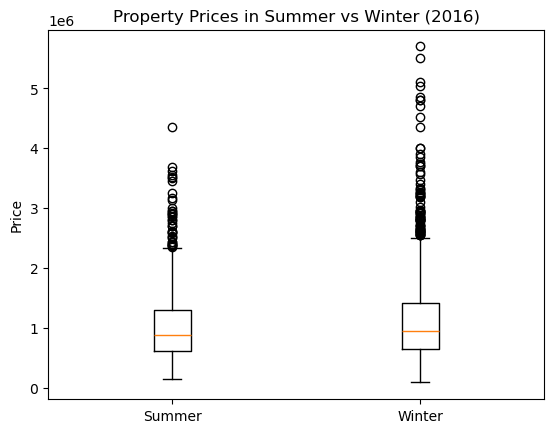

In [10]:
# Step 1: Import Libraries
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Step 2: Load the Data
data = pd.read_csv('property.csv')

# Step 3: Check the Date Column for Issues
print(data['Date'].unique())  # Inspect unique values in the Date column
print(data['Date'].isnull().sum())  # Check for missing values

# Step 4: Convert the Date Column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Use errors='coerce' to handle invalid dates

# Drop rows where the date conversion failed
data = data.dropna(subset=['Date'])

# Filter the Data for the year 2016
data_2016 = data[data['Date'].dt.year == 2016]

# Define winter (October to March) and summer (April to September) months
data_2016['Month'] = data_2016['Date'].dt.month
summer_months = [4, 5, 6, 7, 8, 9]
winter_months = [10, 11, 12, 1, 2, 3]

# Categorize the months
data_2016['Season'] = data_2016['Month'].apply(lambda x: 'Summer' if x in summer_months else 'Winter')

# Separate the prices by season
summer_prices = data_2016[data_2016['Season'] == 'Summer']['Price']
winter_prices = data_2016[data_2016['Season'] == 'Winter']['Price']

# Step 5: Perform the T-Test
t_statistic, p_value = stats.ttest_ind(summer_prices, winter_prices)

# Step 6: Interpret the Results
alpha = 0.05  # significance level
if p_value < alpha:
    conclusion = "Reject the null hypothesis: There is a significant difference in property prices between summer and winter."
else:
    conclusion = "Fail to reject the null hypothesis: There is no significant difference in property prices."

# Print results
print(f"T-Statistic: {t_statistic}, P-Value: {p_value}")
print(conclusion)

# Optional: Visualize the distribution of property prices in each season
plt.boxplot([summer_prices, winter_prices], labels=['Summer', 'Winter'])
plt.title('Property Prices in Summer vs Winter (2016)')
plt.ylabel('Price')
plt.show()


In [ ]:
# 3. For the suburb Abbotsford, what is the probability that out of 10 properties sold, 3 will not have car parking?
# Use the column car in the dataset. Round off your answer to 3 decimal places. 

In [12]:
# Step 1: Import Libraries
import pandas as pd
from scipy.stats import binom

# Step 2: Load the Data
data = pd.read_csv('property.csv')

# Step 3: Filter for Abbotsford
abbotsford_data = data[data['Suburb'] == 'Abbotsford']

# Step 4: Calculate the proportion of properties without car parking
no_car_parking_count = abbotsford_data[abbotsford_data['Car'] == 0].shape[0]
total_properties = abbotsford_data.shape[0]

# Probability of a property not having car parking
p = no_car_parking_count / total_properties

# Step 5: Calculate the probability of exactly 3 out of 10 properties not having car parking
n = 10  # total properties sold
k = 3   # properties without car parking

# Calculate the binomial probability
probability = binom.pmf(k, n, p)

# Round the result to 3 decimal places
probability_rounded = round(probability, 3)

# Print the result
print(f"The probability that out of 10 properties sold in Abbotsford, 3 will not have car parking is: {probability_rounded}")


The probability that out of 10 properties sold in Abbotsford, 3 will not have car parking is: 0.26


In [ ]:
# 4. In the suburb Abbotsford, what are the chances of finding a property with 3 rooms? Round your answer to 3 decimal places. 

In [14]:
# Step 1: Import Libraries
import pandas as pd

# Step 2: Load the Data
data = pd.read_csv('property.csv')

# Step 3: Filter for Abbotsford
abbotsford_data = data[data['Suburb'] == 'Abbotsford']

# Step 4: Calculate the probability of finding a property with 3 rooms
total_properties = abbotsford_data.shape[0]
three_room_properties = abbotsford_data[abbotsford_data['Rooms'] == 3].shape[0]

# Probability of finding a property with 3 rooms
probability = three_room_properties / total_properties if total_properties > 0 else 0

# Round the result to 3 decimal places
probability_rounded = round(probability, 3)

# Print the result
print(f"The probability of finding a property with 3 rooms in Abbotsford is: {probability_rounded}")


The probability of finding a property with 3 rooms in Abbotsford is: 0.357


In [ ]:
# 5. In the suburb Abbotsford, what are the chances of finding a property with 2 bathrooms? Round your answer to 3 decimal places. 

In [16]:
# Step 1: Import Libraries
import pandas as pd

# Step 2: Load the Data
data = pd.read_csv('property.csv')

# Step 3: Filter for Abbotsford
abbotsford_data = data[data['Suburb'] == 'Abbotsford']

# Step 4: Calculate the probability of finding a property with 2 bathrooms
total_properties = abbotsford_data.shape[0]
two_bathroom_properties = abbotsford_data[abbotsford_data['Bathroom'] == 2].shape[0]

# Probability of finding a property with 2 bathrooms
probability = two_bathroom_properties / total_properties if total_properties > 0 else 0

# Round the result to 3 decimal places
probability_rounded = round(probability, 3)

# Print the result
print(f"The probability of finding a property with 2 bathrooms in Abbotsford is: {probability_rounded}")


The probability of finding a property with 2 bathrooms in Abbotsford is: 0.339
